In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Problem 5:---

# Question 1:  Bar Plots 

In [4]:
#### (A)
# Claculating the numbers of males and females for y-axis
counts = list(df['Sex'].value_counts())
# Calculating the unique values from the column "Sex" for x-axis.
values = list(df['Sex'].unique())

<function matplotlib.pyplot.show(close=None, block=None)>

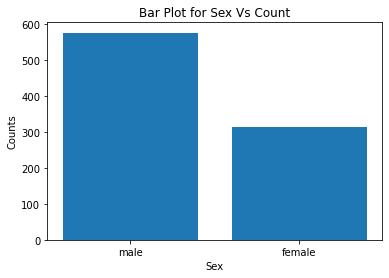

In [5]:
# Using mathplot lib to make bar graph
plt.bar(values,counts)
plt.xlabel("Sex")
plt.ylabel("Counts")
plt.title("Bar Plot for Sex Vs Count")
plt.show

In [6]:
#### (B)
# Claculating the numbers of passenger boarded form each stop for y-axis
counts = list(df['Embarked'].value_counts())
# Calculating the unique values Embarked for x-axis.
values = list(df['Embarked'].dropna().unique())

<function matplotlib.pyplot.show(close=None, block=None)>

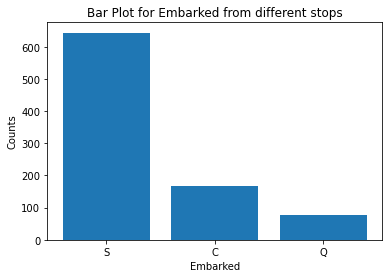

In [7]:
# Using mathplot lib to make bar graph
plt.bar(values,counts)
plt.xlabel("Embarked")
plt.ylabel("Counts")
plt.title("Bar Plot for Embarked from different stops")
plt.show

# Question 2 (a): 

C:\Users\Prayag Purani\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


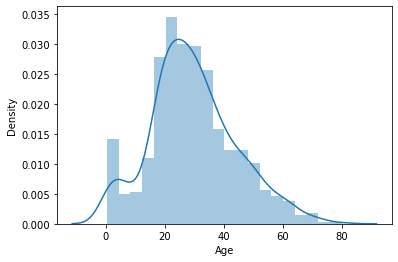

In [8]:
#age = list(df["Age"])
ax = sns.distplot(df["Age"])
plt.show()

In [9]:
# the graph is right skewed so we will be using median imputation
df["Age"] = df["Age"].fillna(df["Age"].median())

In [10]:
df["Age"].isnull().unique()

array([False])

# Question 2(b):

In [11]:
###################################################### (i) #######################################################
# Calculating the Z-score for each age points
m = df["Age"].mean()
s = df["Age"].std()
z_score = list()
outliner_index = list()
threshold = 3
index = 0
for x in df["Age"]:
    z = (x-m)/s
    z_score.append(z)
    if(abs(z)>3):
        outliner_index.append(index)
    index = index + 1
    
df["zscore"] = z_score


In [12]:
#The index of the rows who are outliners by using the threshold 3 to -3 by using z-score
outliner_index

[96, 116, 493, 630, 672, 745, 851]

In [14]:
############################################################# (ii) #######################################################
#Claculating the modified z score
# MAD calculation
md = df["Age"].median()
l1 = list()
for x in df["Age"]:
    l1.append(abs(x-md))
l1.sort()
mid = len(l1) // 2
MAD = (l1[mid] + l1[~mid]) / 2
MAD

6.0

In [15]:
# final modified z score calculation
modified_z_score = list()
outliner_index_2 = list()
threshold = 3
index = 0
for x in df["Age"]:
    z = 0.6745*(x-md)/MAD
    modified_z_score.append(z)
    if(abs(z)>3):
        outliner_index_2.append(index)
    index = index + 1
    
df["modified_zscore"] = modified_z_score

In [16]:
#The index of the rows who are outliners by using the threshold 3 to -3 by using modified z-score
print(*outliner_index_2)

11 15 33 54 78 94 96 116 152 164 170 172 174 183 195 232 252 268 275 280 305 326 366 381 386 438 456 467 469 483 487 492 493 545 555 570 587 625 626 630 644 647 659 672 684 694 745 755 772 788 803 827 829 831 851 879


In [17]:
############################################################# (iii) #######################################################
# Identify outliers using IQR method
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create cleaned_data by removing outliers
df2 = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,zscore,modified_zscore
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,-0.565419,-0.674500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.663488,1.124167
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,-0.258192,-0.224833
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.433068,0.786917
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.433068,0.786917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,-0.181385,-0.112417
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,-0.795839,-1.011750
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,-0.104579,0.000000
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,-0.258192,-0.224833


# Question 3

In [18]:
# Create cleaned_data by removing outliers
cleaned_data = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]
cleaned_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,zscore,modified_zscore
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,-0.565419,-0.674500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.663488,1.124167
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,-0.258192,-0.224833
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.433068,0.786917
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.433068,0.786917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,-0.181385,-0.112417
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,-0.795839,-1.011750
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,-0.104579,0.000000
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,-0.258192,-0.224833


# Question 4:

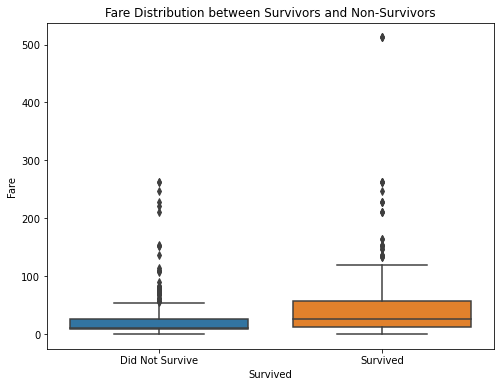

In [19]:
import seaborn as sns
# Create side-by-side box plots
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution between Survivors and Non-Survivors')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.show()


# Question 5 (a):-

In [20]:
# Compute correlation coefficient
# Assuming 'cleaned_data' contains the cleaned dataset without outliers
age_mean = cleaned_data['Age'].mean()
fare_mean = cleaned_data['Fare'].mean()
age_std = cleaned_data['Age'].std()
fare_std = cleaned_data['Fare'].std()
cov_age_fare = ((cleaned_data['Age'] - age_mean) * (cleaned_data['Fare'] - fare_mean)).mean()
correlation_coefficient = cov_age_fare / (age_std * fare_std)
correlation_coefficient

0.0979026675061997

# Question 5 (b)

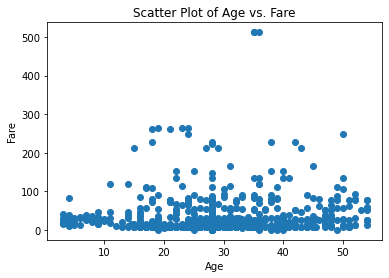

In [21]:
plt.scatter(cleaned_data['Age'], cleaned_data['Fare'])
plt.title('Scatter Plot of Age vs. Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

# Question 6

In [22]:
#Calculating the the mean and std of Age in cleaned data without direct formula
age_sum = 0
n = 0
for i in cleaned_data["Age"]:
    n = n+1
    age_sum = age_sum + i
age_mean = age_sum/n
std_sum = 0

age_variance = 0
for age in cleaned_data['Age']:
    age_variance += (age - age_mean) ** 2
age_std = (age_variance / n) ** 0.5
age_std

10.171085613286342

In [23]:
cleaned_data["Age"].std()

10.177255517167863

In [24]:
#Calculating the the mean and std of Age in cleaned data without direct formula
fare_sum = 0
n = 0
for i in cleaned_data["Fare"]:
    n = n+1
    fare_sum = fare_sum + i
fare_mean = fare_sum/n
std_sum = 0

fare_variance = 0
for fare in cleaned_data['Fare']:
    fare_variance += (fare - fare_mean) ** 2
fare_std = (fare_variance /n ) ** 0.5
fare_std

49.926143408502135

In [25]:
cleaned_data["Fare"].std()

49.95642921256646

In [26]:
# Calculate the percentage of values within one standard deviation
age_within_one_std = ((cleaned_data['Age'] >= (age_mean - age_std)) & (cleaned_data['Age'] <= (age_mean + age_std))).mean() * 100
age_within_one_std

69.6969696969697

In [27]:
fare_within_one_std = ((cleaned_data['Fare'] >= (fare_mean - fare_std)) & (cleaned_data['Fare'] <= (fare_mean + fare_std))).mean() * 100
fare_within_one_std

91.87878787878788